<a href="https://colab.research.google.com/github/rjsdn2308/deep-learning-practice/blob/main/easy_deep_learning_principle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장. 딥러닝 핵심 미리보기

## 나의 첫 딥러닝: '10장 폐암 수술 환자의 생존율 예측' 코드 미리보기

### 1. 환경 준비

In [ ]:
from tensorflow.keras.models import Sequential #keras 라이브러리의 models class에서 Sequential 함수 불러오기
from tensorflow.keras.layers import Dense, Input # layer class에서 Dense 함수 불러오기
from keras.utils import plot_model
import numpy as np # 데이터 전처리를 위해 사용하는 라이브러리 불러오기
from sklearn.model_selection import train_test_split

### 2. 데이터 준비

In [ ]:
!git clone https://github.com/taehojo/data.git

Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.2, random_state=42)

Cloning into 'data'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 9), reused 26 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 483.12 KiB | 3.48 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("./data/ThoraricSurgery3.csv")
df.head()

,1,2.88,2.16,1.1,0,0.1,0.2,1.2,1.3,3,0.3,0.4,0.5,1.4,0.6,60,0.7
0,2,3.40,1.88,0,0,0,0,0,0,1,0,0,0,1,0,51,0
1,2,2.76,2.08,1,0,0,0,1,0,0,0,0,0,1,0,59,0
2,2,3.68,3.04,0,0,0,0,0,0,0,0,0,0,0,0,54,0
3,2,2.44,0.96,2,0,1,0,1,1,0,0,0,0,1,0,73,1
4,2,2.48,1.88,1,0,0,0,1,0,0,0,0,0,0,0,51,0


In [ ]:
# model = Sequential([
#  Input(shape=(16,,))
#  ,Dense(30, activation='relu')
#  ,Dense(1, activation= 'sigmoid')
# ])

model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 3. 구조 결정

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 30)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541 (2.11 KB)

 Trainable params: 541 (2.11 KB)

 Non-trainable params: 0 (0.00 B)

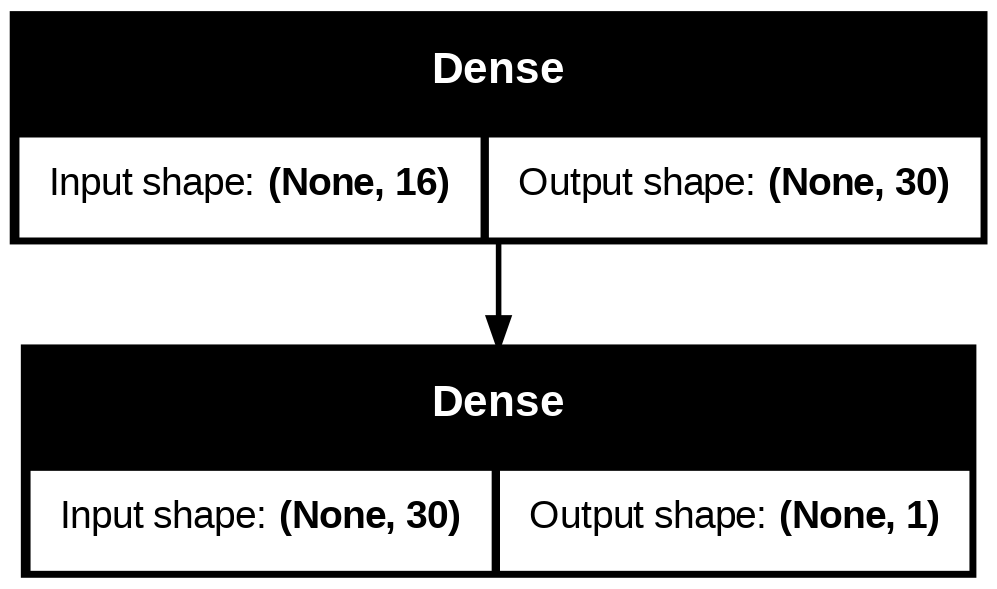

In [ ]:
model = Sequential([
  Input(shape=(16,))
  ,Dense(30, activation='relu')
  ,Dense(1, activation= 'sigmoid')
])

# model.add(Dense(30, input_shape=(16,), activation='relu'))
# model.add(Dense(1, activation= 'sigmoid'))

model.summary()
plot_model(model,show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

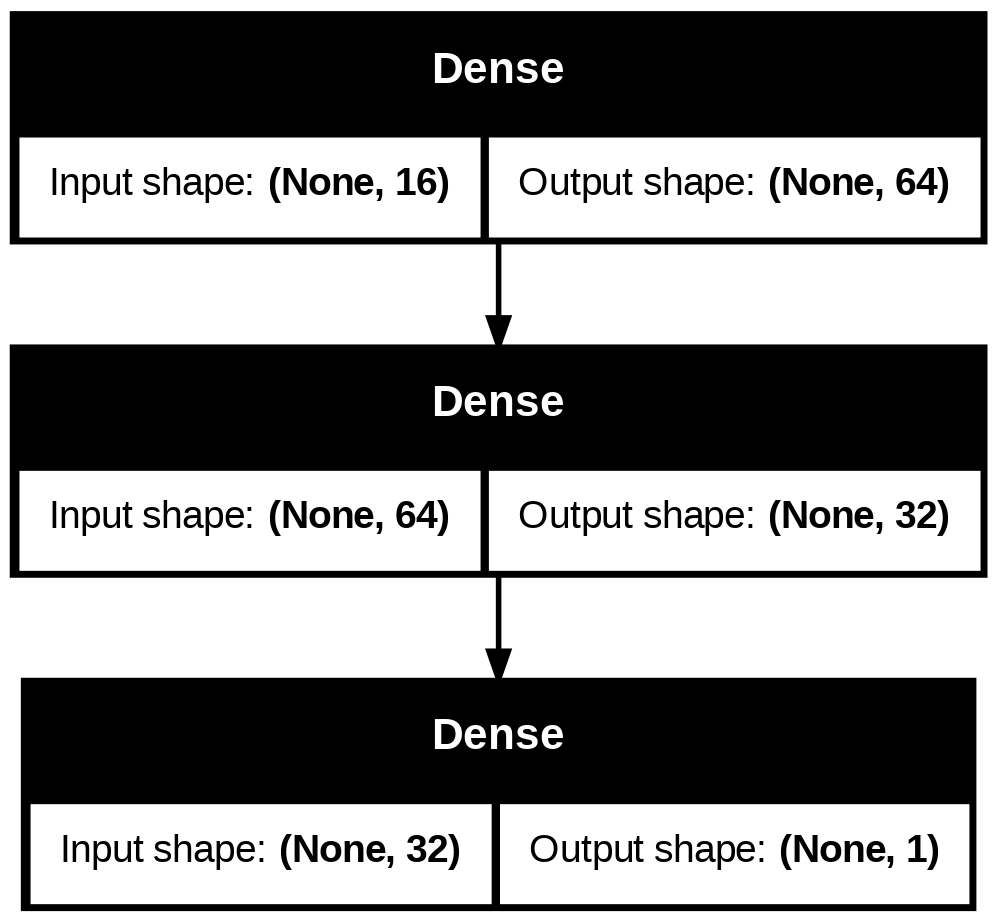

In [ ]:
model2 = Sequential()
model2.add(Input(shape=(16,)))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation= 'sigmoid'))

model2.summary()
plot_model(model2,show_shapes=True)

### 4. 모델 실행

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model2.fit(train_input, train_target, epochs=5, batch_size=16)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8062 - loss: 0.5675
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8713 - loss: 0.4035 
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8565 - loss: 0.4313 
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8667 - loss: 0.4033 
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.4064 


In [ ]:
history.history

{'accuracy': [0.835106372833252,
  0.8643617033958435,
  0.8643617033958435,
  0.8643617033958435,
  0.8643617033958435],
 'loss': [0.5329187512397766,
  0.4131518006324768,
  0.4087074100971222,
  0.41328665614128113,
  0.40503188967704773]}

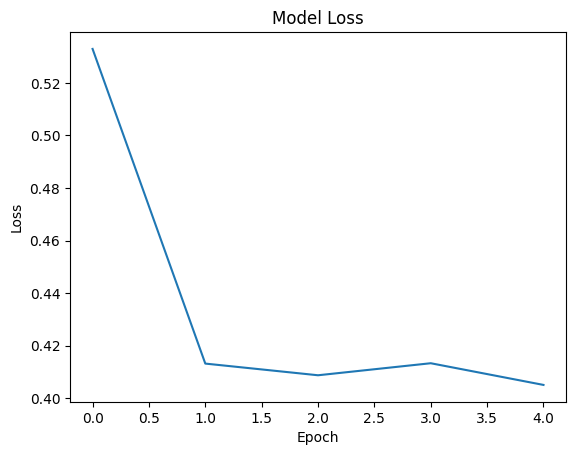

In [ ]:
import matplotlib, matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

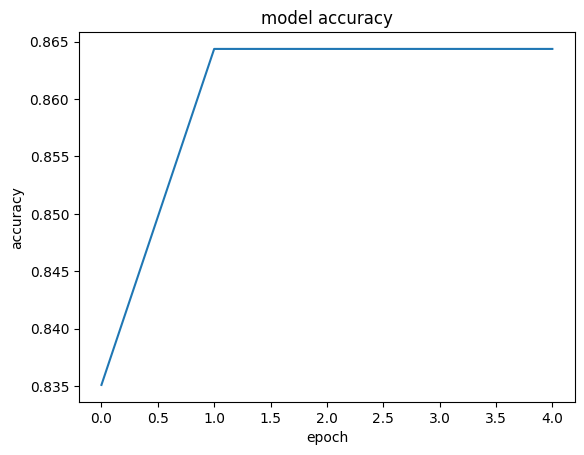

In [ ]:
# @title 기본 제목 텍스트
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

In [ ]:
loss, accuracy = model2.evaluate(test_input, test_target)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7974 - loss: 0.5750 
Test Loss: 0.5834
Test Accuracy: 0.7979


문제 1. train, test 데이터셋을 나누는 코드를 추가하고 다시 실행해보세요.

In [ ]:
# evaluate()의 파리미터값도 추가한 변수 중 테스트 데이터셋으로 변경
loss, accuracy = model.evaluate(test_input, test_target)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7974 - loss: 0.4998
Test Loss: 0.5059
Test Accuracy: 0.7979
